In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from xgboost import XGBClassifier

In [2]:
new_data=pd.read_csv(r'D:\datasets_88705_204267_Real estate.csv')
new_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
drop_data=new_data.drop(['No'],axis=1)

In [4]:
drop_data.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
drop_data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
 from scipy import stats
z = np.abs(stats.zscore(drop_data))
print(z)

[[0.82368321 1.25562833 0.79249504 ... 1.12542986 0.44876222 0.00590088]
 [0.82368321 0.15708622 0.61661163 ... 0.91244418 0.40113894 0.3105072 ]
 [1.54115111 0.38779067 0.41401527 ... 1.48686011 0.68818339 0.6857819 ]
 ...
 [0.35873395 0.09556786 0.54967846 ... 0.82289338 0.42397202 0.19277396]
 [0.52896662 0.84478419 0.77668389 ... 0.18475479 0.4768143  1.06841493]
 [1.24643452 0.98539758 0.78807071 ... 0.42757905 0.63534112 1.90726426]]


In [8]:
threshold = 3
print(np.where(z>3))

(array([  8,   8,  35, 116, 116, 249, 249, 255, 255, 270, 347, 347],
      dtype=int64), array([2, 5, 4, 2, 5, 2, 5, 2, 5, 6, 2, 5], dtype=int64))


In [14]:
data_clean=drop_data[(z<3).all(axis=1)]

In [15]:
drop_data.shape

(414, 7)

In [16]:
data_clean.shape

(407, 7)

In [17]:
data_clean.describe(include="all")

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,2013.146211,17.638329,1017.646541,4.149877,24.969113,121.534069,38.094349
std,0.281490,11.423157,1134.448058,2.939395,0.012150,0.014223,12.876574
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.917000,8.900000,289.324800,1.000000,24.963050,121.529810,28.400000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538850,38.800000
75%,2013.417000,27.800000,1414.837000,6.000000,24.977705,121.543480,46.600000
max,2013.583000,43.800000,4605.749000,10.000000,25.001150,121.566270,78.300000


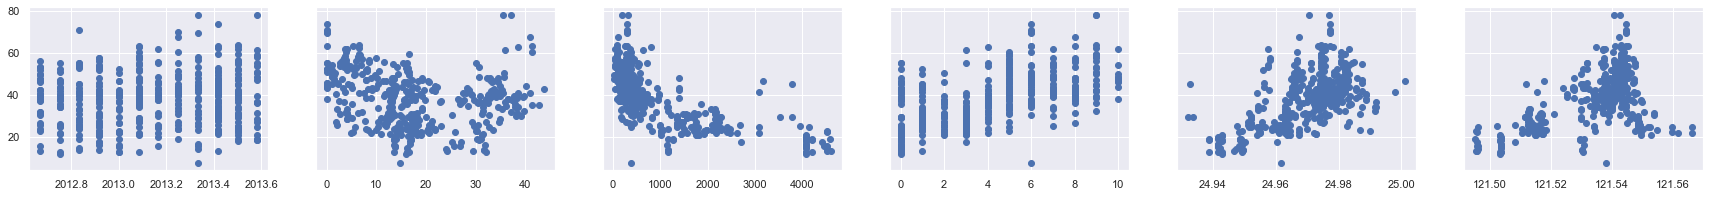

In [32]:
f, (ax1, ax2, ax3 ,ax4, ax5 , ax6) = plt.subplots(1, 6, sharey=True, figsize =(30,3)) #sharey -> share 'Price' as y
ax1.scatter(data_clean['X1 transaction date'],data_clean['Y house price of unit area'])
ax2.scatter(data_clean['X2 house age'],data_clean['Y house price of unit area'])
ax3.scatter(data_clean['X3 distance to the nearest MRT station'],data_clean['Y house price of unit area'])
ax4.scatter(data_clean['X4 number of convenience stores'],data_clean['Y house price of unit area'])
ax5.scatter(data_clean['X5 latitude'],data_clean['Y house price of unit area'])
ax6.scatter(data_clean['X6 longitude'],data_clean['Y house price of unit area'])
plt.show()

In [38]:
log_price=np.log(data_clean['Y house price of unit area'])
data_clean['log_price']=log_price

<ipython-input-38-9bb0cff28d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['log_price']=log_price


In [60]:
data_clean.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,log_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,3.634951
1,2012.917,19.5,306.59470,9,24.98034,121.53951,3.742420
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3.856510
3,2013.500,13.3,561.98450,5,24.98746,121.54391,4.003690
4,2012.833,5.0,390.56840,5,24.97937,121.54245,3.763523


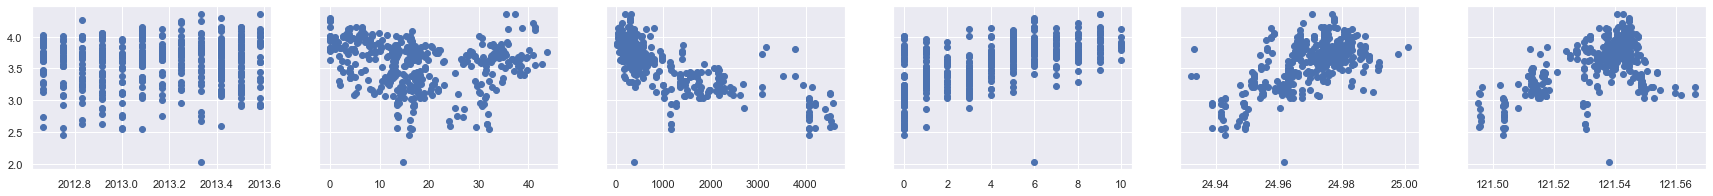

In [42]:
f, (ax1, ax2, ax3 ,ax4, ax5 , ax6) = plt.subplots(1, 6, sharey=True, figsize =(30,3)) #sharey -> share 'Price' as y
ax1.scatter(data_clean['X1 transaction date'],data_clean['log_price'])
ax2.scatter(data_clean['X2 house age'],data_clean['log_price'])
ax3.scatter(data_clean['X3 distance to the nearest MRT station'],data_clean['log_price'])
ax4.scatter(data_clean['X4 number of convenience stores'],data_clean['log_price'])
ax5.scatter(data_clean['X5 latitude'],data_clean['log_price'])
ax6.scatter(data_clean['X6 longitude'],data_clean['log_price'])
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [46]:
vif

,VIF,Features
0,4.261273e+07,X1 transaction date
1,3.432415e+00,X2 house age
2,4.453258e+00,X3 distance to the nearest MRT station
3,4.959467e+00,X4 number of convenience stores
4,6.840592e+06,X5 latitude
5,4.226307e+07,X6 longitude


In [61]:
from sklearn.model_selection import train_test_split

In [63]:
targets = data_clean['log_price']
inputs = data_clean.drop(['log_price'],axis=1)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.4, random_state=1)

In [65]:
from xgboost import XGBRegressor

In [69]:
reg=XGBRegressor(learning_rate=1,max_depth=5,colsample_bytree=0.8)

In [70]:
reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=5, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
y_hat = reg.predict(x_train)

<function matplotlib.pyplot.show(*args, **kw)>

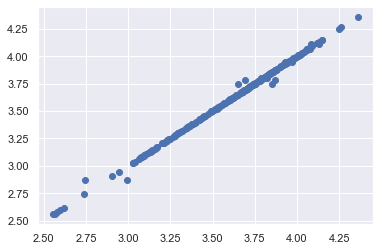

In [72]:
plt.scatter(y_train,y_hat)
plt.show

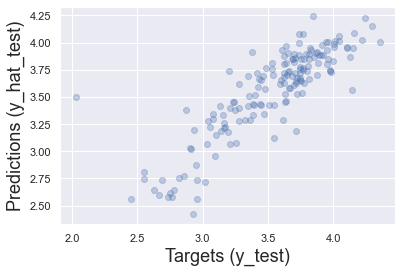

In [82]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test,alpha=0.3)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [83]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,58.876713
1,31.609957
2,24.866659
3,37.711895
4,46.999298


In [84]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    3.740048
1    3.230804
2    3.161247
3    3.713572
4    3.681351
Name: log_price, dtype: float64

In [85]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,58.876713,42.1
1,31.609957,25.3
2,24.866659,23.6
3,37.711895,41.0
4,46.999298,39.7
...,...,...
158,30.802485,31.3
159,37.322433,36.3
160,13.196350,15.9
161,24.148418,40.9


In [86]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [87]:
df_pf.describe()

,Prediction,Target,Residual
count,163.000000,163.000000,163.000000
mean,37.449951,36.582209,-0.867747
std,12.842576,13.707756,7.492528
min,11.266331,7.600000,-25.615954
25%,28.214387,25.600000,-4.843905
50%,38.967625,37.700000,-0.702522
75%,47.060913,44.400000,3.007056
max,69.368492,78.000000,27.756419


In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_train, y_hat)*100

99.75528251046258

In [90]:
r2_score(y_test, y_hat_test)*100

71.18988658702364